# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 199 instances and 16 features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,130,111,5000,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,130,111,5000,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,152,154,5000,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,109,102,5500,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,136,115,5500,18,22,17450


### Check the number of null values in each column get a general description of your data

In [4]:
df.drop(['normalized-losses'], axis=1,inplace=True)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   symboling        199 non-null    int64  
 1   make             199 non-null    object 
 2   fuel-type        199 non-null    object 
 3   body-style       199 non-null    object 
 4   drive-wheels     199 non-null    object 
 5   engine-location  199 non-null    object 
 6   wheel-base       199 non-null    float64
 7   length           199 non-null    float64
 8   width            199 non-null    float64
 9   height           199 non-null    float64
 10  engine-type      199 non-null    object 
 11  engine-size      199 non-null    int64  
 12  horsepower       199 non-null    int64  
 13  peak-rpm         199 non-null    int64  
 14  city-mpg         199 non-null    int64  
 15  highway-mpg      199 non-null    int64  
 16  price            199 non-null    int64  
dtypes: float64(4), i

,symboling,wheel-base,length,width,height,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,98.824121,174.151256,65.882412,53.775879,126.824121,103.396985,5117.587940,25.201005,30.683417,13243.432161
std,1.257009,6.090838,12.371905,2.110996,2.447039,41.752932,37.553843,480.521824,6.451826,6.849410,7978.707609
min,-2.000000,86.600000,141.100000,60.300000,47.800000,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.550000,64.100000,52.000000,97.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,119.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,102.400000,183.500000,66.700000,55.550000,143.000000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,120.900000,208.100000,72.000000,59.800000,326.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


- There are no null values in each column.
- The `.describe()` function outputs 8 numbers for each column in the dataset. 
    - The first value 'count' shows how many rows have non-missing values
    - The second value is the mean, which is the average. 
    - std is the standard deviation, which measures how numerically spread out the values are.
    - For all the below values the data should be arranged in ascending order first.
        - min and max represent the minimum and maximum values in that column
        - The value 50% represents the median in every column.
        - 25% represents the value which lies above the 25% of the values in the data.
        - 75% represents the value which lies above the 75% of the values in the data.

In [6]:
df['horsepower']= pd.to_numeric(df['horsepower'])
df['peak-rpm']= pd.to_numeric(df['peak-rpm'])

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

<AxesSubplot:xlabel='price', ylabel='Density'>

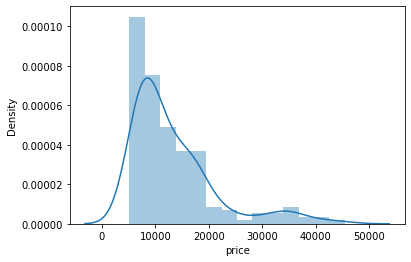

In [7]:
sns.distplot(df['price'],kde=True)

- Try guessing the distribution of the target variable.
- There exists a skewness towards the right.

In [31]:
df['price'].skew()

1.8096753390980749

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

<AxesSubplot:xlabel='count', ylabel='make'>

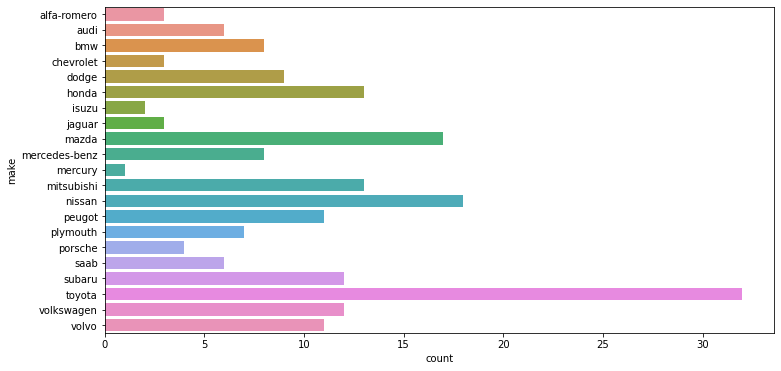

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(y='make', data=df)

**Insight: It can be seen that majority of the automobiles in the dataset are manufactured by toyota with more than 40% than the 2nd highest Nissan.**

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

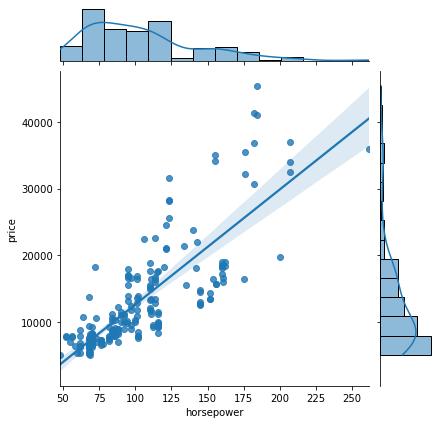

In [9]:
sns.jointplot('horsepower', 'price', data=df, kind='reg')

**Insight: There is a linear relationship between the horsepower and price. More the horsepower, higher is the price of the car.**

### Plot the insurance risk ratings for all the automobiles

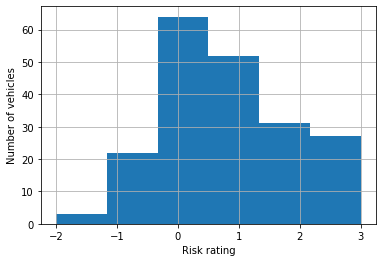

In [10]:
df['symboling'].hist(bins=6)
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

**Insight: It seems that majority of the automobiles have a risk rating of 0 and above. This indicates a good measure of safety.**

### Plot a pie chart of the fuel-type of the automobiles

Text(0.5, 1.0, 'Fuel-Type diagram')

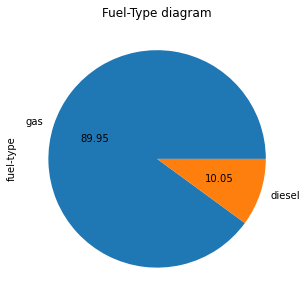

In [11]:
df['fuel-type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Fuel-Type diagram')

**Insight: Looks like majority of the vehicles run on gas.**

### Plot the pearson correlation of all the features in a heatmap.

<AxesSubplot:>

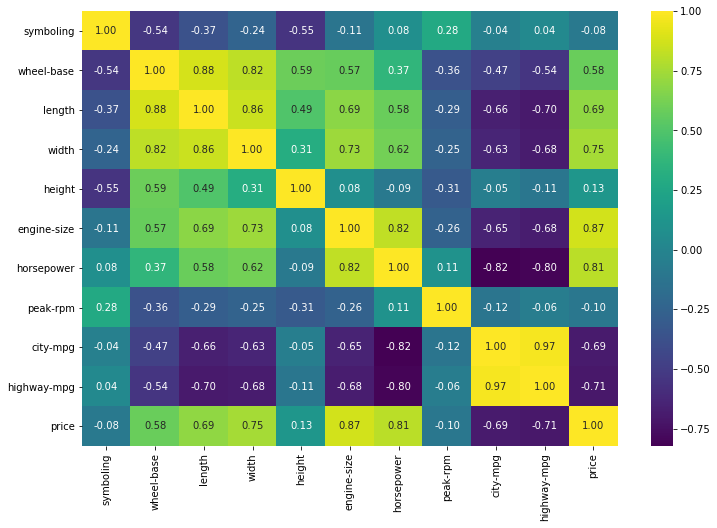

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis',annot=True, fmt='.2f')

The pearson correlation coefficients calculated above are only for continuous features. The color table index next to the heatmap shows the varying levels of correlation.

A high negative correlation is denoted by darker shades and features having a high positive correlation are indicated by lighter shades

**Insights: There are some good inferences we can take it from the correlation heat map.**

- Wheel base is highly correlated with length and width of the car.

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

<AxesSubplot:xlabel='body-style', ylabel='price'>

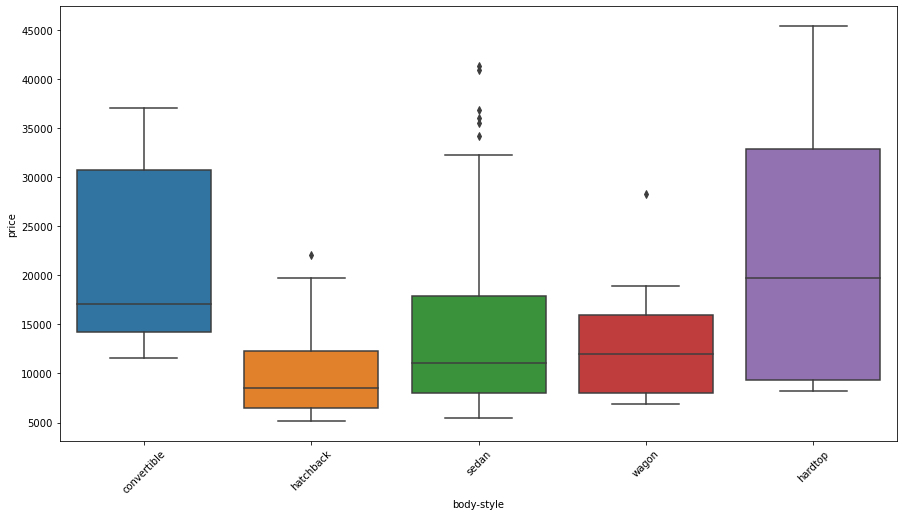

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('body-style', 'price', data=df)

- The four boxes for every body type represent the interquartile ranges for each of them and the lines within every box represent the median.
- The dotted points for hatchback, sedan and wagon are outliers.

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

<AxesSubplot:xlabel='make', ylabel='price'>

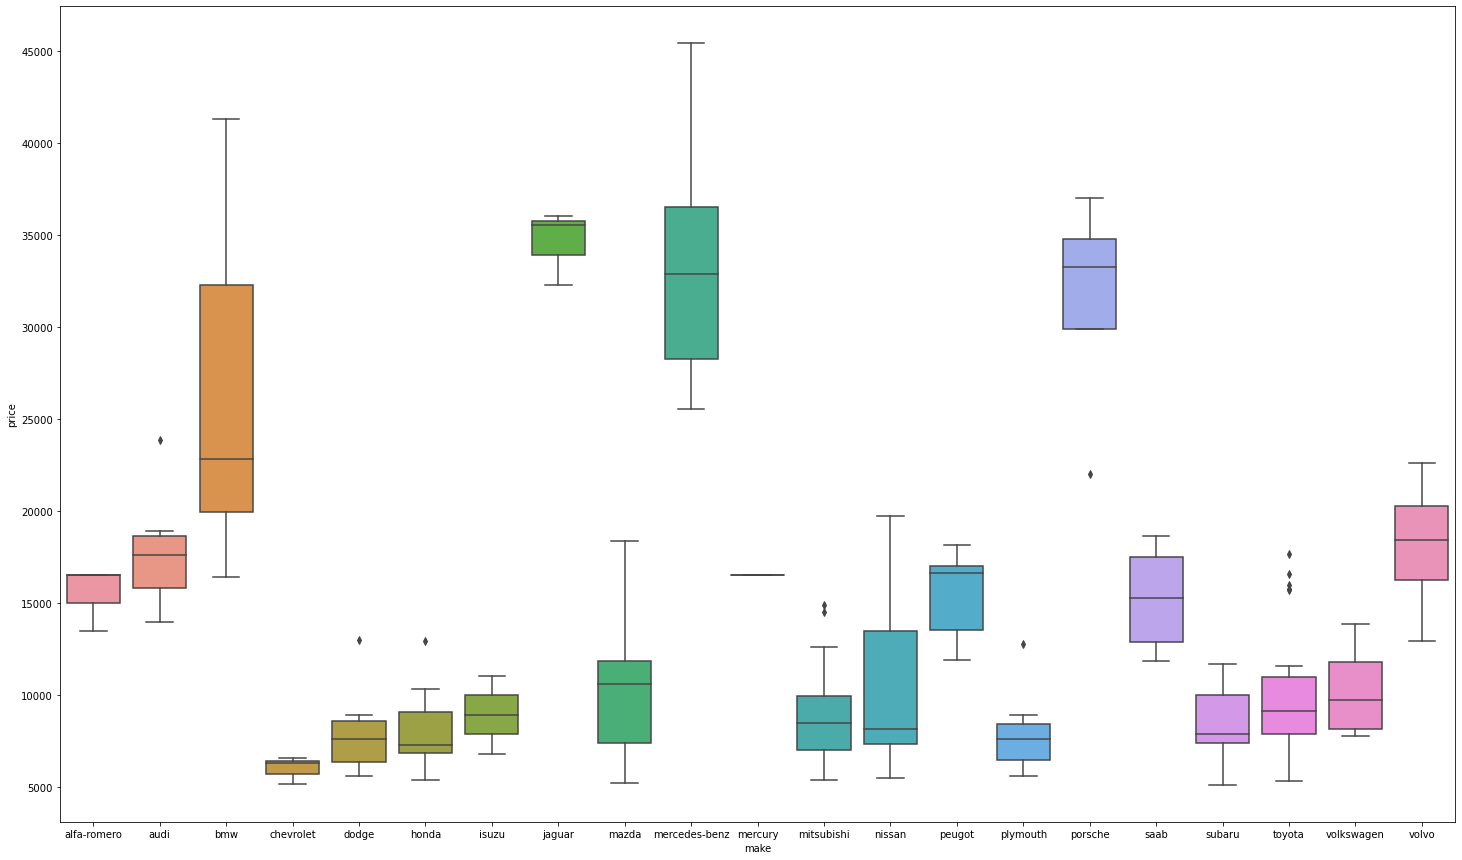

In [14]:
plt.rcParams['figure.figsize']=(25,15)
sns.boxplot('make','price',data=df)

**Insights: Below are our Insights on the make and price of the car**
   
    - The premium cars costing more than 20000 are BMW, Jaguar, Mercedes benz and Porsche
    - The most expensive car is manufactured by Mercedes benz and the least expensive is Chevrolet
    - Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars
    - Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru

## Data Preprocessing for the Automobile dataset

In [15]:
automobile = pd.read_csv('Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,130,111,5000,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,130,111,5000,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,152,154,5000,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,109,102,5500,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,136,115,5500,18,22,17450


### Find out number of records having '?' value for normalized losses

In [16]:
# Number of records having '?' value
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

35

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [19]:
#Replacing '?' by 'NaN' and then Imputing missing data in the columns 'normalized-losses','horsepower'
automobile = automobile.replace("?","NaN")
numeric_imp = SimpleImputer(missing_values=np.nan,strategy='mean')
automobile['normalized-losses'] = numeric_imp.fit_transform(automobile[['normalized-losses']])
automobile['horsepower'] = numeric_imp.fit_transform(automobile[['horsepower']])


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [20]:
numeric_feature_auto = automobile._get_numeric_data().columns
for feature in numeric_feature_auto:
    if skew(automobile[feature])>1:
        automobile[feature] = np.sqrt(automobile[feature])

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [21]:
automobile['area'] = automobile['height'] * automobile['width']


###  Label Encode the categorical features.


In [22]:
# Function to Label Encode the categorical columns
def dummyEncode(automobile):
    columnsToEncode = list(automobile.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            automobile[feature] = le.fit_transform(automobile[feature])
        except:
            print('Error encoding '+feature)
    return automobile
automobile = dummyEncode(automobile)

### Split the Independent features and target(`price`) variable into X and y. 

In [23]:
X  = automobile.drop('price',1)
y = automobile['price']

### Split X and y into training and validation data and apply the Linear regression Model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error: ",mean_squared_error(y_pred, y_val))
print("R2 Score: ",r2_score(y_pred, y_val))
print("Mean Absolute Error: ",mean_absolute_error(y_pred, y_val))
print("RMSE: ",np.sqrt(mean_squared_error(y_pred, y_val)))

Mean Squared Error:  162.31584532970714
R2 Score:  0.8440357123902189
Mean Absolute Error:  10.192751712460144
RMSE:  12.740323595957332


# Thank You